# PCA with sklearn

In [7]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## create a ML model without dimensionality reduction.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_predict = logisticRegr.predict(X_test)
# print(predictions)


print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Dimensionality reduction with PCA

[[-3.37399894e-01 -2.59040494e+00]
 [ 1.36078095e+00  1.53967246e-01]
 [ 1.92559482e+00  9.03786202e-01]
 [ 1.04155740e+00 -1.76613312e+00]
 [ 1.81394234e+00 -8.47011058e-01]
 [ 2.53790595e-03 -1.28679215e+00]
 [ 2.66172937e+00  6.23072539e-01]
 [ 6.89917956e-01  7.16397089e-01]
 [-4.49528444e-02 -1.53918489e+00]
 [ 1.18175475e+00 -5.65753895e-01]
 [ 9.79236198e-01 -3.63561790e-01]
 [ 2.11426070e-01 -1.52270906e+00]
 [ 1.38116712e+00 -9.91726256e-01]
 [ 1.01841242e+00  7.54062733e-01]
 [ 1.41039316e+00  1.62644372e-01]
 [ 3.94059266e-01  8.19589534e-01]
 [-2.18190139e+00 -3.32344120e-01]
 [ 1.01399725e+00 -7.48219221e-01]
 [ 1.54964147e-01 -8.48159962e-01]
 [-1.33873997e-01 -4.17702507e-01]
 [ 1.21341746e-01 -1.31561396e+00]
 [ 5.26554907e-01 -1.20849096e-02]
 [ 1.86047099e+00  8.45284482e-01]
 [-2.18677975e+00  1.14497389e+00]
 [-2.67914189e+00 -7.38171047e-01]
 [ 1.44742721e+00 -5.24314121e-01]
 [ 3.04252798e-03 -1.69794864e-01]
 [-1.92062720e+00  5.36912236e-01]
 [-2.11936030e+00  2

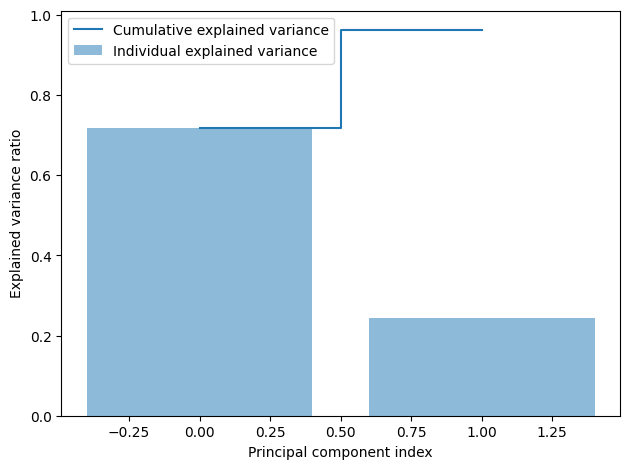

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.78      0.82        18
           2       0.69      0.82      0.75        11

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45



In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(X_train)


exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_predict = logisticRegr.predict(X_test)
# print(predictions)


print(classification_report(y_test, y_predict))

# Unsupervised learning with sk-learn

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


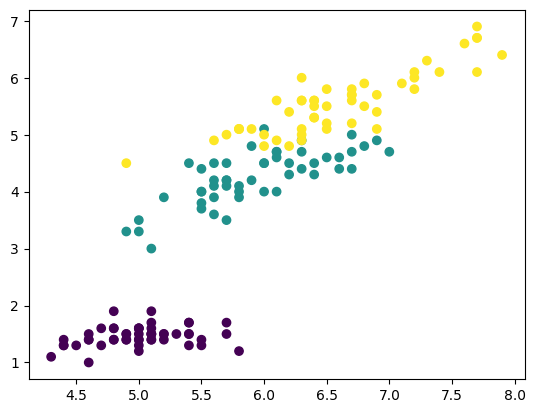

In [10]:
import matplotlib.pyplot as plt

iris_df = datasets.load_iris()

# Features
print(iris_df.feature_names)

# Targets
print(iris_df.target)

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## Apply K-mean clustering on the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


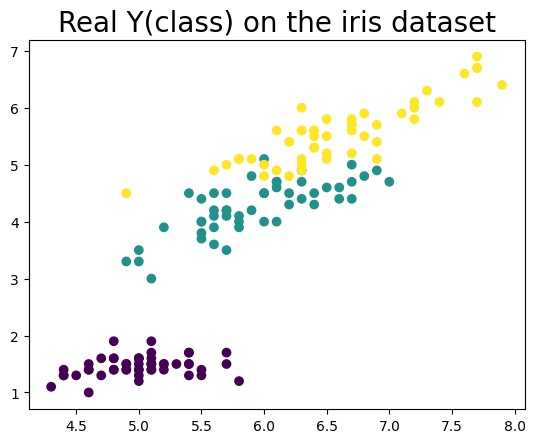

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


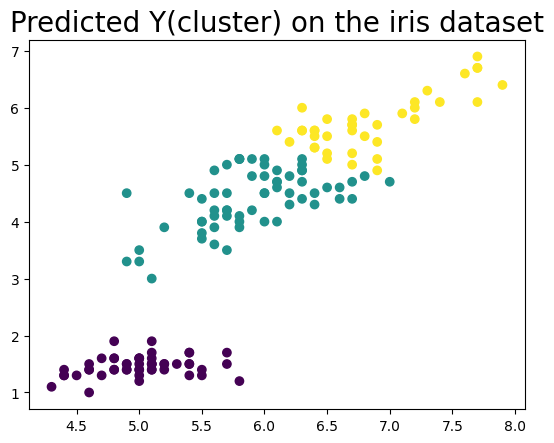

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.77      0.86        62
           2       0.72      0.95      0.82        38

    accuracy                           0.89       150
   macro avg       0.89      0.91      0.89       150
weighted avg       0.91      0.89      0.89       150



In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)


# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions


# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.title('Real Y(class) on the iris dataset', size=20)
plt.show()
print(iris_df.target)

# Plotting
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.title('Predicted Y(cluster) on the iris dataset', size=20)
plt.show()
print(all_predictions)

print(classification_report(all_predictions, iris_df.target))